In [62]:
import pandas as pd
import os
from scipy import stats
import matplotlib.pyplot as plt

In [41]:
folder_path = 'data'

In [42]:
os.getcwd()

'c:\\Users\\Everyday\\Desktop\\HPI\\ss24\\ds4w-user-identification'

In [43]:
accelerometer1 = pd.read_csv(os.path.join(folder_path, 'nick1', 'ACG.csv'),sep=';')
gyroscope1 = pd.read_csv(os.path.join(folder_path, 'nick1','GYRO.csv'),sep=';')
accelerometer1.rename(columns={'x':'accelerometer_x','y':'accelerometer_y','z':'accelerometer_z'}, inplace=True)
gyroscope1.rename(columns={'x':'gyroscope_x','y':'gyroscope_y','z':'gyroscope_z'}, inplace=True)

In [44]:
accelerometer2 = pd.read_csv(os.path.join(folder_path, 'nick2', 'ACG.csv'),sep=';')
gyroscope2 = pd.read_csv(os.path.join(folder_path, 'nick2','GYRO.csv'),sep=';')
accelerometer2.rename(columns={'x':'accelerometer_x','y':'accelerometer_y','z':'accelerometer_z'}, inplace=True)
gyroscope2.rename(columns={'x':'gyroscope_x','y':'gyroscope_y','z':'gyroscope_z'}, inplace=True)

In [79]:
len(accelerometer1), len(gyroscope1), len(accelerometer2), len(gyroscope2)

(243238, 243235, 231522, 231517)

In [73]:
mean_accelerometer1 = accelerometer1[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']].mean()
mean_gyroscope1 = gyroscope1[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']].mean()
mean_accelerometer2 = accelerometer2[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']].mean()
mean_gyroscope2 = gyroscope2[['gyroscope_x', 'gyroscope_y', 'gyroscope_z']].mean()
walk1 = pd.concat([mean_accelerometer1, mean_gyroscope1])
walk2 = pd.concat([mean_accelerometer2, mean_gyroscope2])

In [74]:
t_stat, p_val = stats.ttest_ind(walk1, walk2)

In [75]:
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')

T-statistic: -0.03506801215482
P-value: 0.9727156362856884


In [80]:
stat, p = stats.levene(walk1, walk2)

In [81]:
print(f'Statistic: {stat}')
print(f'p-value: {p}')

Statistic: 0.0007852234007611178
p-value: 0.9781960746700792


In [46]:
merged2 = pd.merge(accelerometer1, gyroscope1, on='t_Android',how='inner')

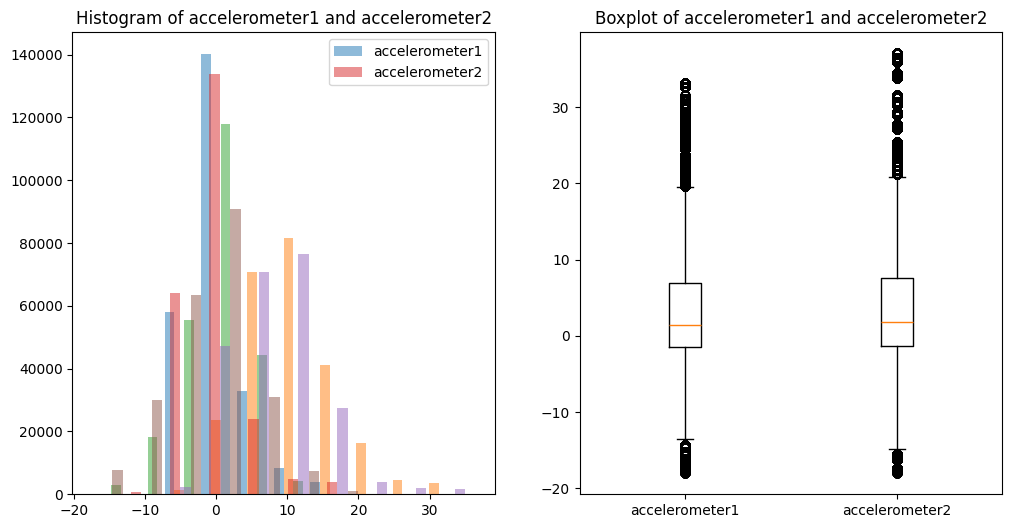

In [65]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(accelerometer1[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']], bins=10, alpha=0.5, label='accelerometer1')
plt.hist(accelerometer2[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']], bins=10, alpha=0.5, label='accelerometer2')
plt.legend(loc='upper right')
plt.title('Histogram of accelerometer1 and accelerometer2')

plt.subplot(1, 2, 2)
plt.boxplot([accelerometer1[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']].values.flatten(), accelerometer2[['accelerometer_x', 'accelerometer_y', 'accelerometer_z']].values.flatten()], labels=['accelerometer1', 'accelerometer2'])
plt.title('Boxplot of accelerometer1 and accelerometer2')

plt.show()

In [48]:
(merged2.t_Android.max() - merged2.t_Android.min())/ len(merged2)

2215612.874183403

In [49]:
(merged2.t_unix_x.max(), merged2.t_unix_x.min(), merged2.t_unix_y.max(), merged2.t_unix_y.min())

(1714829434716, 1714828895885, 1714829434716, 1714828895885)

In [50]:
len(merged2)/18

13513.055555555555